<center>
    <H1> DECISION TREE CLASSIFIER </H1>
    <br>
======================================================================================================================
<br>
A Decision Tree is a simple classification algorithm in which rules are learned from the training data in the if-else structure. It represents a tree-like structure, where each node is a rule or condition which divides the data set into sub-classes.

## STEP 1: IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier           # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split      # FOR train_test_split function
from sklearn.metrics import confusion_matrix, accuracy_score

## STEP 2: LOAD DATASET

In [2]:
dataset = pd.read_csv('data/LI_dataset.csv') 
dataset.head()

,connectionsCount,experienceCount,educationCount,volunteerCount,recommendationsCount,honorsCount,courseCount,projectsCount,testCount,publicationCount,bgImage,skillsCount,label
0,79,0,2,0,0,0,0,0,0,0,0,3,0
1,500,1,4,0,0,0,0,0,0,0,0,13,0
2,108,1,1,0,0,0,0,0,0,0,0,4,0
3,500,2,3,1,2,2,0,6,0,0,0,25,0
4,500,14,0,0,1,0,0,0,0,1,1,0,0


In [3]:
# Independent attributes
features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)
features

['connectionsCount',
 'experienceCount',
 'educationCount',
 'volunteerCount',
 'recommendationsCount',
 'honorsCount',
 'courseCount',
 'projectsCount',
 'testCount',
 'publicationCount',
 'bgImage',
 'skillsCount']

In [4]:
#split dataset in features and target variable
X = dataset[features] # Features
y = dataset.label # Target variable

## STEP 3: CREATE TEST AND TRAIN SETS

We will randomly split our dataset in 80–20 ratio. Where 80% of the total data will be used as training set and rest 20% will be considered as test set. 

In [5]:
'''
    We have X_train, y_train, X_test, y_test.
    Using these lists and dataframes we will randomly create two non-overlapping datasets 
        1. training set
        2. testing set
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

print("Number of training instances: ", X_train.shape[0])
print("Number of testing instances: ", X_test.shape[0])

Number of training instances:  86
Number of testing instances:  22


## STEP 4: TRAIN THE CLASSIFIER 

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_impurity_decrease=0.001)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

## STEP 5: TEST THE CLASSIFIER 

Now our model is ready. We will test our data against given labels. For every test case, predict the class label

In [7]:
#Predict the response for test dataset
y_predict = clf.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

## STEP 6: EVALUATION OF CLASSIFICATION RESULTS

The classifier will be evaluted using Accuracy, Recall, Precision and F-measure. For this first, a confusion matrix will be created. 

In [8]:
#true negatives is C(0,0), false negatives is C(1,0), false positives is C(0,1) and true positives is C(1,1) 
conf_matrix = confusion_matrix(y_test, y_predict)

In [9]:
#true_negative
TN = conf_matrix[0][0]
#false_negative
FN = conf_matrix[1][0]
#false_positive
FP = conf_matrix[0][1]
#true_positive
TP = conf_matrix[1][1]

In [10]:
# Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN)

recall = (TP)/(TP + FN)

In [11]:
# Precision is the the total number of correctly classified positive examples divided by the total number of predicted positive examples. 
# High Precision indicates an example labeled as positive is indeed positive (small number of FP)

precision = (TP)/(TP + FP)

In [12]:
fmeasure = (2*recall*precision)/(recall+precision)
accuracy = (TP + TN)/(TN + FN + FP + TP)

accuracy_score(y_test, y_predict)

0.9090909090909091

In [13]:
print("------ CLASSIFICATION PERFORMANCE OF DECISION TREE MODEL ------ \n"\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )


------ CLASSIFICATION PERFORMANCE OF DECISION TREE MODEL ------ 

 Recall :  60.0 %
 Precision :  100.0 %
 Accuracy :  90.9090909090909 %
 F-measure :  74.99999999999999 %


## VISUALIZATION OF THE DECISION TREE 

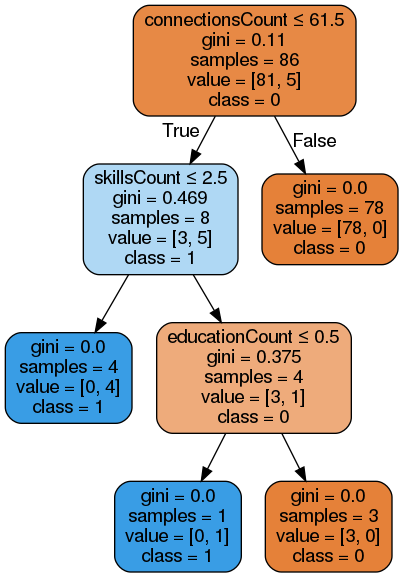

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('twitter.png')
Image(graph.create_png())
